In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    precision_recall_curve, roc_curve, roc_auc_score
    
)
from sklearn.model_selection import GridSearchCV

In [3]:
data=pd.read_csv('data_pivotedMDI.csv')

In [4]:
data.head(14)

,Year,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain
0,2006,22550.000000,5440.333333,21340.333333,NaN,NaN,27500.833333,19037.000000,4288.500000,4168.500000,37256.333333,23331.000000,10812.333333,12011.166667,14769.333333
1,2007,23782.666667,6430.666667,22741.333333,NaN,NaN,28582.333333,19623.000000,6027.333333,5319.833333,38430.166667,25040.500000,11263.500000,13023.166667,15668.000000
2,2008,24774.333333,7345.166667,23952.666667,24228.000000,22098.800000,27545.166667,19285.444444,6894.500000,6231.333333,40022.000000,25419.500000,11427.333333,14266.500000,18899.666667
3,2009,25957.000000,6982.500000,24445.666667,24650.500000,23516.500000,26054.333333,20167.833333,5956.833333,5430.500000,40797.833333,25672.500000,11586.333333,13940.500000,18857.333333
4,2010,26321.333333,6743.333333,25053.166667,25187.000000,24031.500000,24936.500000,20172.500000,5654.166667,4938.500000,41105.333333,24960.000000,11572.833333,14176.500000,18085.000000
5,2011,26973.666667,7221.500000,26102.500000,25573.000000,23173.000000,24436.666667,20393.666667,5931.166667,5471.166667,42273.666667,24916.666667,11300.166667,14236.166667,17992.000000
6,2012,26850.000000,7977.000000,27029.833333,25766.666667,23537.333333,25242.333333,20088.833333,6106.666667,6042.333333,44181.500000,25125.000000,11217.500000,13872.000000,17605.666667
7,2013,28667.333333,8880.333333,27224.333333,25750.000000,23832.666667,25365.333333,20088.833333,6731.833333,6340.000000,43871.333333,26133.333333,11048.666667,14154.500000,17417.000000
8,2014,28513.666667,9881.000000,27393.000000,25836.666667,24186.000000,27018.000000,20268.666667,7475.000000,6877.333333,44390.333333,27116.666667,11290.333333,14680.333333,17374.666667
9,2015,28722.666667,10318.333333,27653.666667,26030.000000,24541.666667,27748.333333,20760.000000,8082.333333,7399.000000,46749.000000,27200.000000,11965.333333,14593.000000,17768.000000


In [5]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data['Austria'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: nan
Critial Values:
   1%, -4.01
Critial Values:
   5%, -3.10
Critial Values:
   10%, -2.69

p-value: nan
Non-Stationary


In [6]:
data_noyear = data.drop('Year', axis=1)

In [7]:
data_noyear.head(14)

,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain
0,22550.000000,5440.333333,21340.333333,NaN,NaN,27500.833333,19037.000000,4288.500000,4168.500000,37256.333333,23331.000000,10812.333333,12011.166667,14769.333333
1,23782.666667,6430.666667,22741.333333,NaN,NaN,28582.333333,19623.000000,6027.333333,5319.833333,38430.166667,25040.500000,11263.500000,13023.166667,15668.000000
2,24774.333333,7345.166667,23952.666667,24228.000000,22098.800000,27545.166667,19285.444444,6894.500000,6231.333333,40022.000000,25419.500000,11427.333333,14266.500000,18899.666667
3,25957.000000,6982.500000,24445.666667,24650.500000,23516.500000,26054.333333,20167.833333,5956.833333,5430.500000,40797.833333,25672.500000,11586.333333,13940.500000,18857.333333
4,26321.333333,6743.333333,25053.166667,25187.000000,24031.500000,24936.500000,20172.500000,5654.166667,4938.500000,41105.333333,24960.000000,11572.833333,14176.500000,18085.000000
5,26973.666667,7221.500000,26102.500000,25573.000000,23173.000000,24436.666667,20393.666667,5931.166667,5471.166667,42273.666667,24916.666667,11300.166667,14236.166667,17992.000000
6,26850.000000,7977.000000,27029.833333,25766.666667,23537.333333,25242.333333,20088.833333,6106.666667,6042.333333,44181.500000,25125.000000,11217.500000,13872.000000,17605.666667
7,28667.333333,8880.333333,27224.333333,25750.000000,23832.666667,25365.333333,20088.833333,6731.833333,6340.000000,43871.333333,26133.333333,11048.666667,14154.500000,17417.000000
8,28513.666667,9881.000000,27393.000000,25836.666667,24186.000000,27018.000000,20268.666667,7475.000000,6877.333333,44390.333333,27116.666667,11290.333333,14680.333333,17374.666667
9,28722.666667,10318.333333,27653.666667,26030.000000,24541.666667,27748.333333,20760.000000,8082.333333,7399.000000,46749.000000,27200.000000,11965.333333,14593.000000,17768.000000


In [8]:
data_backforwardfilled=data_noyear.bfill()
data_backforwardfilled

,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain
0,22550.000000,5440.333333,21340.333333,24228.000000,22098.800000,27500.833333,19037.000000,4288.500000,4168.500000,37256.333333,23331.000000,10812.333333,12011.166667,14769.333333
1,23782.666667,6430.666667,22741.333333,24228.000000,22098.800000,28582.333333,19623.000000,6027.333333,5319.833333,38430.166667,25040.500000,11263.500000,13023.166667,15668.000000
2,24774.333333,7345.166667,23952.666667,24228.000000,22098.800000,27545.166667,19285.444444,6894.500000,6231.333333,40022.000000,25419.500000,11427.333333,14266.500000,18899.666667
3,25957.000000,6982.500000,24445.666667,24650.500000,23516.500000,26054.333333,20167.833333,5956.833333,5430.500000,40797.833333,25672.500000,11586.333333,13940.500000,18857.333333
4,26321.333333,6743.333333,25053.166667,25187.000000,24031.500000,24936.500000,20172.500000,5654.166667,4938.500000,41105.333333,24960.000000,11572.833333,14176.500000,18085.000000
5,26973.666667,7221.500000,26102.500000,25573.000000,23173.000000,24436.666667,20393.666667,5931.166667,5471.166667,42273.666667,24916.666667,11300.166667,14236.166667,17992.000000
6,26850.000000,7977.000000,27029.833333,25766.666667,23537.333333,25242.333333,20088.833333,6106.666667,6042.333333,44181.500000,25125.000000,11217.500000,13872.000000,17605.666667
7,28667.333333,8880.333333,27224.333333,25750.000000,23832.666667,25365.333333,20088.833333,6731.833333,6340.000000,43871.333333,26133.333333,11048.666667,14154.500000,17417.000000
8,28513.666667,9881.000000,27393.000000,25836.666667,24186.000000,27018.000000,20268.666667,7475.000000,6877.333333,44390.333333,27116.666667,11290.333333,14680.333333,17374.666667
9,28722.666667,10318.333333,27653.666667,26030.000000,24541.666667,27748.333333,20760.000000,8082.333333,7399.000000,46749.000000,27200.000000,11965.333333,14593.000000,17768.000000


In [9]:
data_interpolate=data_noyear.interpolate()
data_interpolate

,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain
0,22550.000000,5440.333333,21340.333333,NaN,NaN,27500.833333,19037.000000,4288.500000,4168.500000,37256.333333,23331.000000,10812.333333,12011.166667,14769.333333
1,23782.666667,6430.666667,22741.333333,NaN,NaN,28582.333333,19623.000000,6027.333333,5319.833333,38430.166667,25040.500000,11263.500000,13023.166667,15668.000000
2,24774.333333,7345.166667,23952.666667,24228.000000,22098.800000,27545.166667,19285.444444,6894.500000,6231.333333,40022.000000,25419.500000,11427.333333,14266.500000,18899.666667
3,25957.000000,6982.500000,24445.666667,24650.500000,23516.500000,26054.333333,20167.833333,5956.833333,5430.500000,40797.833333,25672.500000,11586.333333,13940.500000,18857.333333
4,26321.333333,6743.333333,25053.166667,25187.000000,24031.500000,24936.500000,20172.500000,5654.166667,4938.500000,41105.333333,24960.000000,11572.833333,14176.500000,18085.000000
5,26973.666667,7221.500000,26102.500000,25573.000000,23173.000000,24436.666667,20393.666667,5931.166667,5471.166667,42273.666667,24916.666667,11300.166667,14236.166667,17992.000000
6,26850.000000,7977.000000,27029.833333,25766.666667,23537.333333,25242.333333,20088.833333,6106.666667,6042.333333,44181.500000,25125.000000,11217.500000,13872.000000,17605.666667
7,28667.333333,8880.333333,27224.333333,25750.000000,23832.666667,25365.333333,20088.833333,6731.833333,6340.000000,43871.333333,26133.333333,11048.666667,14154.500000,17417.000000
8,28513.666667,9881.000000,27393.000000,25836.666667,24186.000000,27018.000000,20268.666667,7475.000000,6877.333333,44390.333333,27116.666667,11290.333333,14680.333333,17374.666667
9,28722.666667,10318.333333,27653.666667,26030.000000,24541.666667,27748.333333,20760.000000,8082.333333,7399.000000,46749.000000,27200.000000,11965.333333,14593.000000,17768.000000


In [10]:
data_noyear.describe()

,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain
count,14.000000,14.000000,15.000000,12.000000,12.000000,13.000000,13.000000,15.000000,14.000000,14.000000,15.000000,14.000000,14.000000,14.000000
mean,27697.642857,9106.130952,26550.277778,25867.097222,24673.900000,27432.474359,20371.675214,7557.311111,6808.440476,44448.583333,27001.011111,11847.000000,14532.035714,17942.000000
std,2904.250017,2696.802980,2564.612459,956.465876,1812.681341,2324.593711,878.927189,2131.287980,1893.109241,4956.531307,2568.989096,961.768257,1338.154149,1425.923009
min,22550.000000,5440.333333,21340.333333,24228.000000,22098.800000,24436.666667,19037.000000,4288.500000,4168.500000,37256.333333,23331.000000,10812.333333,12011.166667,14769.333333
25%,26048.083333,7042.250000,24749.416667,25476.500000,23532.125000,25365.333333,20088.833333,5992.083333,5440.666667,40874.708333,25082.750000,11270.208333,13994.000000,17464.166667
50%,27743.666667,8428.666667,27224.333333,25801.666667,24108.750000,27500.833333,20172.500000,6894.500000,6285.666667,44026.416667,26133.333333,11500.083333,14251.333333,18038.500000
75%,29966.416667,10787.083333,28256.500000,26215.833333,25559.083333,28582.333333,20760.000000,8748.666667,7819.250000,48144.500000,28500.000000,12235.583333,14930.333333,18838.333333
max,32321.333333,14167.333333,29837.000000,27713.333333,28421.333333,32149.333333,22083.333333,11776.666667,10782.666667,53900.333333,32200.000000,14278.000000,17326.000000,20382.000000


 EURO_COUNTRIES = ['Austria', 'Estonia', 'Finland', 'France', 'Germany', 'Ireland','Italy', 'Latvia','Lithuania','Luxembourg', 'Netherlands', 'Portugal','Slovenia','Spain']

In [11]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_interpolate['Austria'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: 0.49
Critial Values:
   1%, -4.33
Critial Values:
   5%, -3.23
Critial Values:
   10%, -2.75

p-value: 0.98
Stationary


In [12]:
data_backfilled_missingdropped=data_backforwardfilled.dropna()

In [13]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Austria'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -0.71
Critial Values:
   1%, -4.33
Critial Values:
   5%, -3.23
Critial Values:
   10%, -2.75

p-value: 0.85
Stationary


In [14]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Estonia'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: 3.07
Critial Values:
   1%, -4.67
Critial Values:
   5%, -3.37
Critial Values:
   10%, -2.80

p-value: 1.00
Stationary


In [15]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Finland'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -2.12
Critial Values:
   1%, -4.67
Critial Values:
   5%, -3.37
Critial Values:
   10%, -2.80

p-value: 0.24
Stationary


In [16]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['France'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -0.18
Critial Values:
   1%, -4.22
Critial Values:
   5%, -3.19
Critial Values:
   10%, -2.73

p-value: 0.94
Stationary


In [17]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Germany'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: 6.88
Critial Values:
   1%, -4.67
Critial Values:
   5%, -3.37
Critial Values:
   10%, -2.80

p-value: 1.00
Stationary


In [18]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Ireland'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: 1.67
Critial Values:
   1%, -4.67
Critial Values:
   5%, -3.37
Critial Values:
   10%, -2.80

p-value: 1.00
Stationary


In [19]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Italy'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: 2.60
Critial Values:
   1%, -4.67
Critial Values:
   5%, -3.37
Critial Values:
   10%, -2.80

p-value: 1.00
Stationary


In [20]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Latvia'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -0.38
Critial Values:
   1%, -4.14
Critial Values:
   5%, -3.15
Critial Values:
   10%, -2.71

p-value: 0.91
Stationary


In [21]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Lithuania'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: 3.79
Critial Values:
   1%, -4.33
Critial Values:
   5%, -3.23
Critial Values:
   10%, -2.75

p-value: 1.00
Stationary


In [22]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Luxembourg'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: 0.49
Critial Values:
   1%, -4.67
Critial Values:
   5%, -3.37
Critial Values:
   10%, -2.80

p-value: 0.98
Stationary


In [23]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Netherlands'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -0.45
Critial Values:
   1%, -4.14
Critial Values:
   5%, -3.15
Critial Values:
   10%, -2.71

p-value: 0.90
Stationary


In [24]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Portugal'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: 0.84
Critial Values:
   1%, -4.14
Critial Values:
   5%, -3.15
Critial Values:
   10%, -2.71

p-value: 0.99
Stationary


In [25]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Slovenia'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: 2.65
Critial Values:
   1%, -4.33
Critial Values:
   5%, -3.23
Critial Values:
   10%, -2.75

p-value: 1.00
Stationary


In [26]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Spain'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -1.35
Critial Values:
   1%, -4.47
Critial Values:
   5%, -3.29
Critial Values:
   10%, -2.77

p-value: 0.60
Stationary


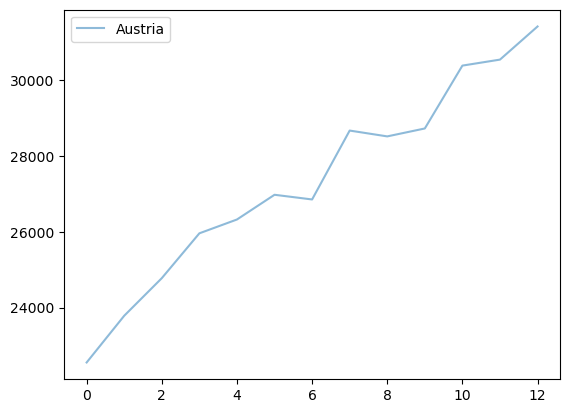

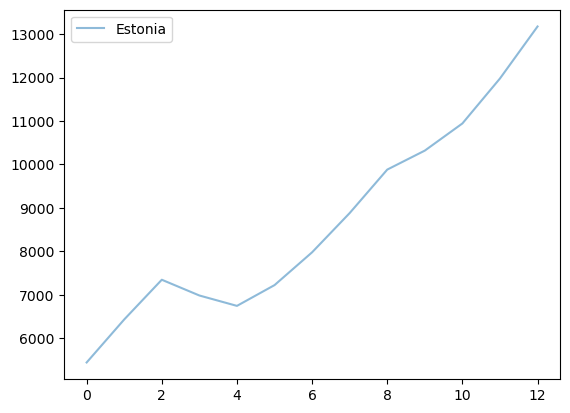

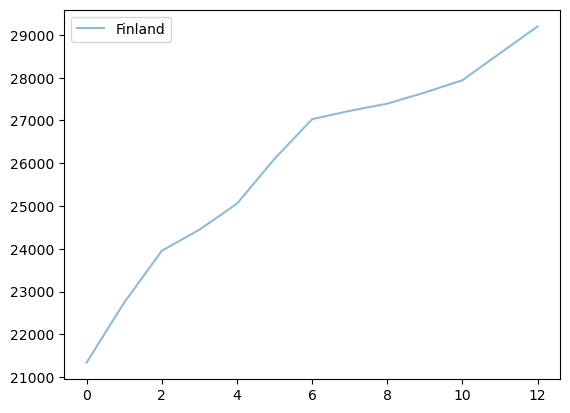

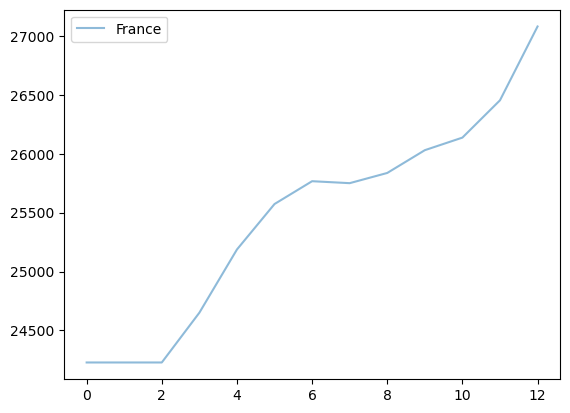

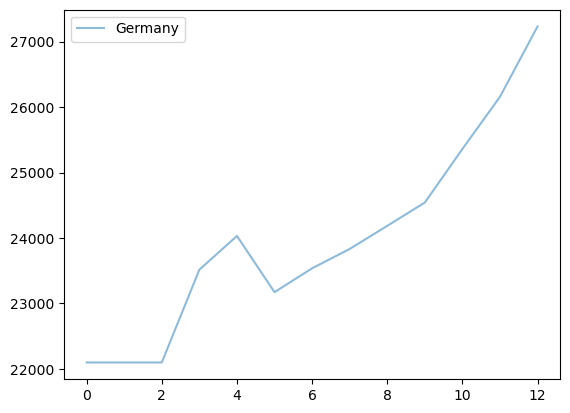

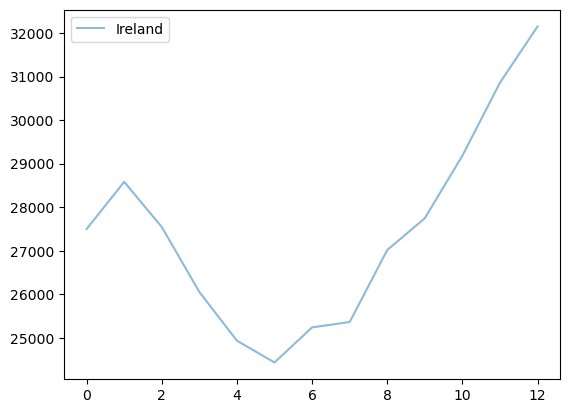

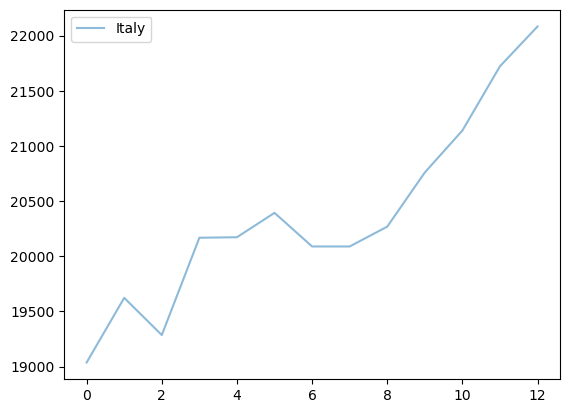

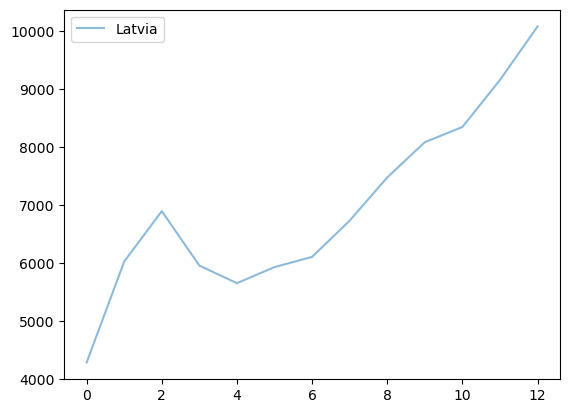

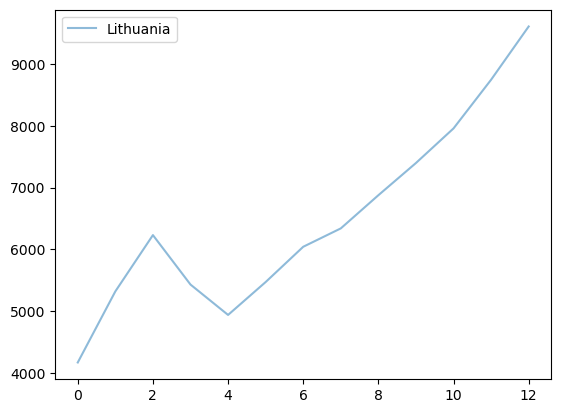

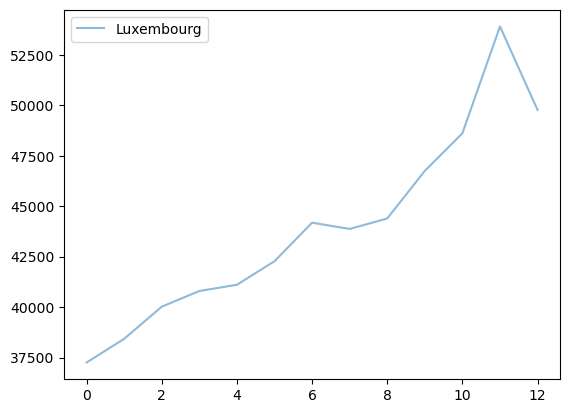

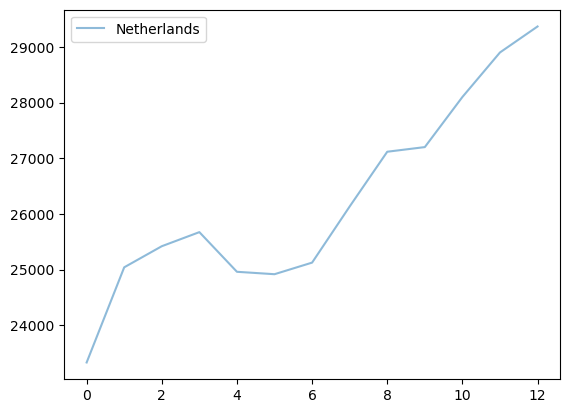

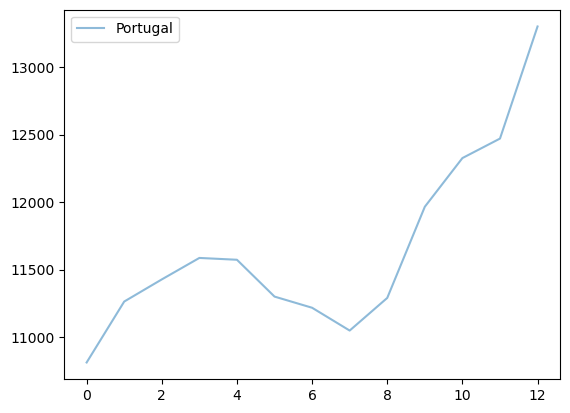

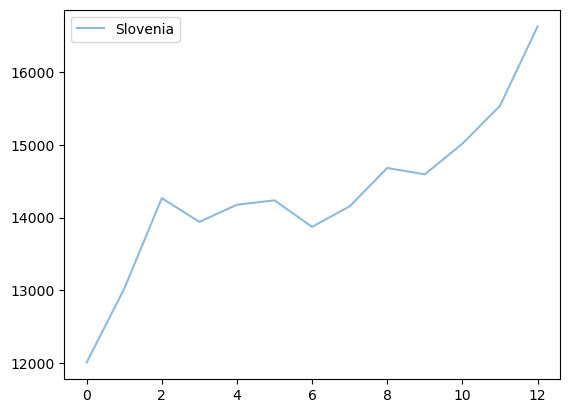

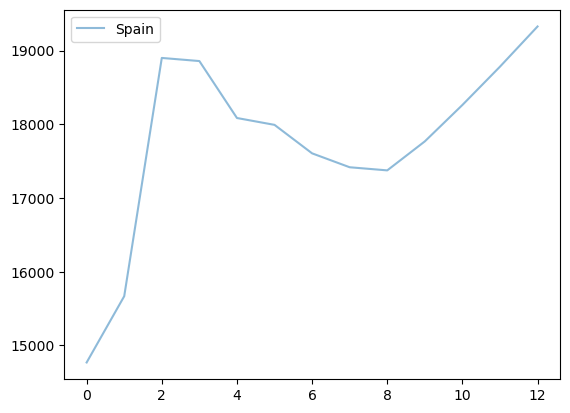

In [27]:
data_backfilled_missingdropped[['Austria']].plot(alpha=0.5);
data_backfilled_missingdropped[['Estonia']].plot(alpha=0.5);
data_backfilled_missingdropped[['Finland']].plot(alpha=0.5);
data_backfilled_missingdropped[['France']].plot(alpha=0.5);
data_backfilled_missingdropped[['Germany']].plot(alpha=0.5);
data_backfilled_missingdropped[['Ireland']].plot(alpha=0.5);
data_backfilled_missingdropped[['Italy']].plot(alpha=0.5);
data_backfilled_missingdropped[['Latvia']].plot(alpha=0.5);
data_backfilled_missingdropped[['Lithuania']].plot(alpha=0.5);
data_backfilled_missingdropped[['Luxembourg']].plot(alpha=0.5);
data_backfilled_missingdropped[['Netherlands']].plot(alpha=0.5);
data_backfilled_missingdropped[['Portugal']].plot(alpha=0.5);
data_backfilled_missingdropped[['Slovenia']].plot(alpha=0.5);
data_backfilled_missingdropped[['Spain']].plot(alpha=0.5);